# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Загрузим данные из файла в датафрейм.
#### Изучим общую информацию о полученном датафрейме.
#### Построим общую гистограмму для всех числовых столбцов таблицы.

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#Импортируем необходимые в ходе выполнения работы библиотеки

In [145]:
try:
    data = pd.read_csv('')
except:
    data=pd.read_csv('datasets\real_estate_data.csv', sep='\t')
#Открываем файл

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


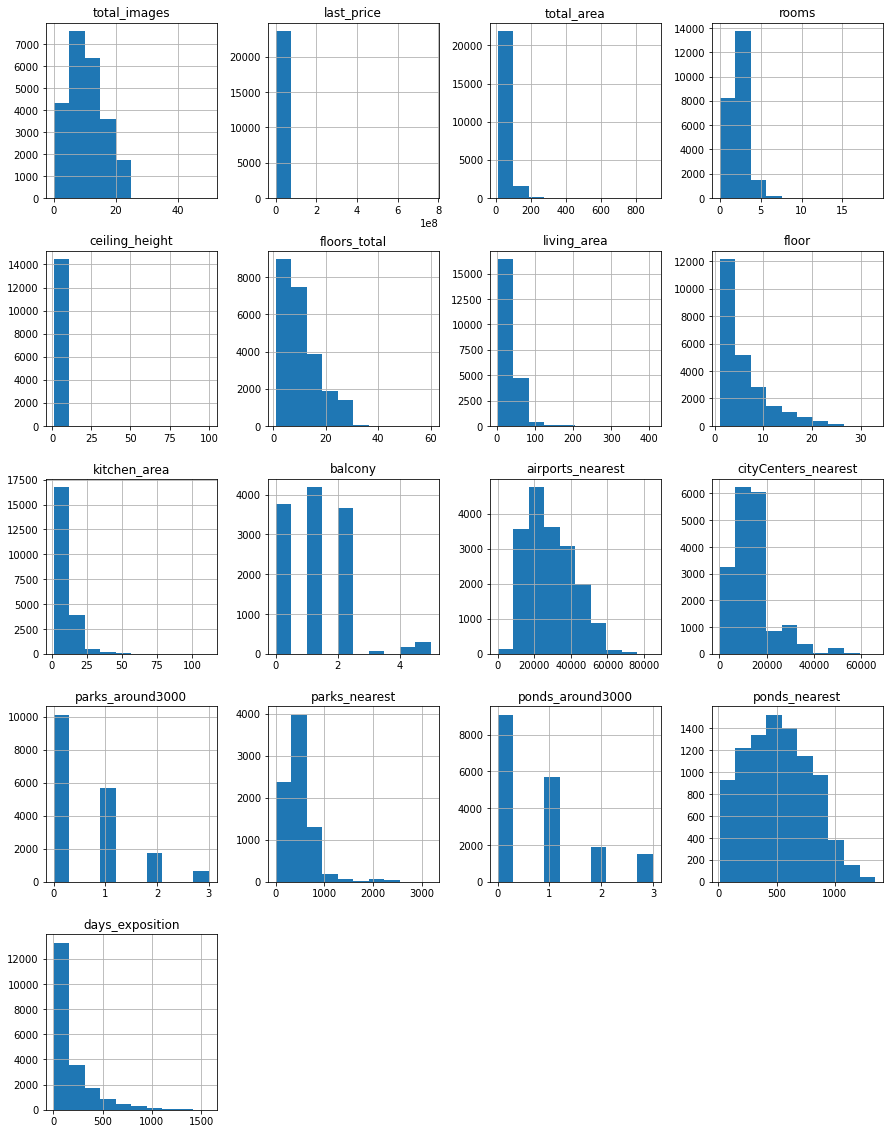

In [146]:
print(data.info()) #Выведем основную информацию о датафрейме
data.hist(figsize=(15, 20)); #построим общие гистограммы
data.head(15) #выведем первые 15 строк датафрейма

### Предобработка данных

#### Найдем и изучим пропущенные значения в столбцах.
#### Рассмотрим типы данных в каждом столбце.
#### Изучим уникальные значения в столбце с названиями и установим неявные дубликаты.
#### Найдем и устраним редкие и выбивающиеся значения.

In [147]:
data.isna().sum().sort_values(ascending=False) #узнали сколько ячеек и в каких столбцах являются пустыми

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Больше всего пропусков в **is_apartment, parks_nearest, ponds_nearest, balcony, ceiling_height**.

Можно предположить, что **is_apartment** не заполнялось, т.к. многие могут не до конца иметь представление, что же это такое - аппартаменты. Думаю, пустые ячейки заполним просто ``False``

**parks_nearest и ponds_nearest** можно частично дополнить данными из **parks_around3000 и ponds_around3000** соответственно (предположив, что расстояние до ближайшего парка/водоема равно 3 км), а остальные значения, наверное оставим без изменений.

**balcony** имеет пустые ячейки скорее всего потому что, в квартире прсто нет этого самого балкона.

**ceiling_height** - скорее всего просто при формировании анкеты решили не заморачиваться с замеркой потолков. Можем заполнить высоту потолков медианным значением или средним, думаю разница будет небольшой.

Что касается остальных столбцов:

**airports_nearest, cityCenters_nearest** - оставим без изменений, т.к. достаточно сложно судить о таких вещах не имея информации о точном адресе недвижимости.

**ponds_around3000 и parks_around3000** - вероятнее всего ячейки остались пустыми потому что в пределах 3 км нет водоемов/парков, поэтому - заполним их как-нибудь так: "нет парка/водоема в прееделах 3 км", либо просто **0**

**days_exposition** - можем предположить, что этих данных нет, потому что объявление еще открыто. Оставлю без изменений.

**kitchen_area и living_area** - можем заполнить медианными значениями, которые будут соответствовать количеству комнат в квартире.

**floors_total и locality_name** - несколько сложно придумать, что можно сделать с пустыми значениями в пустых колонках, поэтому мы их просто отбросим, их количество мало относительно датасета.

Так же не стоит забывать об аномальных значениях (например о потолках в высоту 100 м).

In [148]:
#data = data.query('ceiling_height < 10')
data = data.loc[~((data['floors_total'].isna()) | (data['locality_name'].isna()))]

In [149]:
data['is_apartment'] = (data['is_apartment'].fillna(value = False))
# присвоили FALSE пустым значениям в столбце 'is_apartment'

In [150]:
data['ponds_nearest'] = data.loc[data['ponds_around3000'] > 0, 'ponds_nearest'].fillna(value=3000)
data['parks_nearest'] = data.loc[data['parks_around3000'] > 0, 'parks_nearest'].fillna(value=3000)
# заполнили пустные ячейки в соответствии со смежными данными

Не заполняет...

In [151]:
data['parks_nearest'].unique()

array([4.820e+02,       nan, 9.000e+01, 8.400e+01, 1.120e+02, 3.100e+02,
       2.940e+02, 5.900e+02, 4.200e+02, 7.590e+02, 2.480e+02, 5.170e+02,
       4.110e+02, 4.520e+02, 5.320e+02, 4.590e+02, 7.250e+02, 4.700e+01,
       6.200e+02, 6.750e+02, 5.310e+02, 5.260e+02, 2.710e+02, 3.630e+02,
       6.480e+02, 3.820e+02, 3.340e+02, 1.670e+02, 4.450e+02, 2.310e+02,
       5.110e+02, 7.510e+02, 6.660e+02, 3.840e+02, 1.270e+02, 2.410e+02,
       4.880e+02, 1.560e+02, 5.760e+02, 2.850e+02, 6.330e+02, 1.500e+01,
       2.150e+02, 5.330e+02, 1.410e+02, 3.660e+02, 3.410e+02, 5.890e+02,
       3.440e+02, 5.080e+02, 4.170e+02, 7.620e+02, 4.410e+02, 5.590e+02,
       7.490e+02, 5.010e+02, 1.000e+01, 1.133e+03, 1.205e+03, 5.160e+02,
       8.600e+02, 2.760e+02, 9.800e+02, 4.630e+02, 5.910e+02, 2.390e+02,
       6.510e+02, 1.021e+03, 4.850e+02, 5.860e+02, 3.700e+02, 6.880e+02,
       2.750e+02, 5.460e+02, 4.660e+02, 1.390e+02, 2.510e+02, 5.370e+02,
       6.270e+02, 1.040e+02, 4.500e+02, 6.570e+02, 

In [152]:
data['balcony'] = data['balcony'].fillna(0)
# заполнили пустые ячейки 0

In [153]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#заполнили пустые ячейки медианным значением в столбце 'ceiling_height'

In [154]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
# заполнили пустые ячейки "кодовой" фразой

In [155]:
mid_area = data.groupby('rooms')['living_area'].median()
for i in data['rooms'].unique():
    data.loc[((data['living_area'].isna()) & (data['rooms'] == i)), 'living_area'] = mid_area[i]

kitchen_area = data.groupby('rooms')['kitchen_area'].median()
for i in data['rooms'].unique():
    data.loc[((data['kitchen_area'].isna()) & (data['rooms'] == i)), 'kitchen_area'] = kitchen_area[i]

В **kitchen_area** остались пустые значение. Это квартиры, которые имеют 0 комнат, таких строк всего 81. Отбросим их.

In [156]:
data = data.loc[~(data['kitchen_area'].isna())]

In [157]:
data['last_price'] = data['last_price'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['floor'] = data['floor'].astype('int64')
data['floors_total'] = data['floors_total'].astype('int64')
#препобразуем типы данныхи
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23371 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23371 non-null  int64  
 1   last_price            23371 non-null  int64  
 2   total_area            23371 non-null  float64
 3   first_day_exposition  23371 non-null  object 
 4   rooms                 23371 non-null  int64  
 5   ceiling_height        23371 non-null  float64
 6   floors_total          23371 non-null  int64  
 7   living_area           23371 non-null  float64
 8   floor                 23371 non-null  int64  
 9   is_apartment          23371 non-null  bool   
 10  studio                23371 non-null  bool   
 11  open_plan             23371 non-null  bool   
 12  kitchen_area          23371 non-null  float64
 13  balcony               23371 non-null  int64  
 14  locality_name         23371 non-null  object 
 15  airports_nearest   

Преобразовали типы данных.

**last_price** - цена достаточно велика, чтобы считать копейки.

**balcony** - не может же быть не целое число балконов... то же касается **parks_around3000 и ponds_around3000** 

In [158]:
data['locality_name'].unique()

change = ["посёлок ", "поселок городского типа ", "поселок ", "деревня ",
         "посёлок городского типа ", "садовое товарищество ", "село ",
         "городской поселок ", "городской посёлок ", "поселок станции ",
         "посёлок при железнодорожной станции ", "городского типа ",
         "городской ", "при железнодорожной станции ", "станции ", "коттеджный ",
         "садоводческое некоммерческое товарищество"]
changer = ''
data['locality_name'] = data['locality_name'].replace(change, changer, regex=True)
data['locality_name'].sort_values().unique()

array([' Лесная Поляна', 'Агалатово', 'Александровская', 'Алексеевка',
       'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка',
       'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ив

В начале мы имеем 281 одно уникальное название населенного пункта. А в конце 239, прорядили ряды(:

In [159]:
data.loc[data['ceiling_height']>=20, 'ceiling_height'] = data['ceiling_height']/10

Исправим значения, где высота потолков не менее 20 м.

И еще раз посмотрим на количество пустых ячеек.

In [160]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5447
cityCenters_nearest      5424
parks_around3000            0
parks_nearest           15373
ponds_around3000            0
ponds_nearest           14403
days_exposition          3157
dtype: int64

А что на счет выбросов...

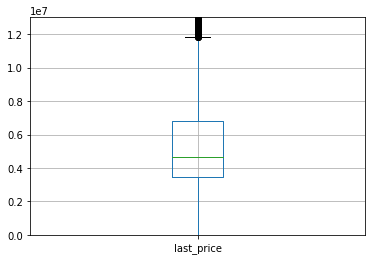

In [161]:
data.boxplot('last_price')
plt.ylim(0, 13000000)
data = data.query('last_price < 20000000')

Возьмем недвижимость стоимость которой находится в пределах 20 млн руб. Остальную недвижимость будем счиать элитной...

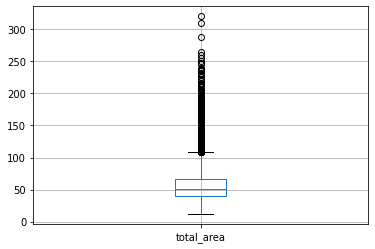

In [162]:
data.boxplot('total_area');

Можно, в принципе, отбросить три значения, которые выделаются на фоне остальных, но не вижу в этом смысла.

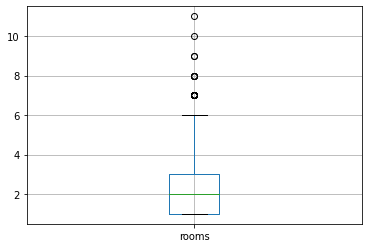

In [163]:
data.boxplot('rooms');

С количеством комнат тоже всё в порядке в общем и целом. Видно что подавляющее большинство объявлений имеют от 1 до 3 комнат.

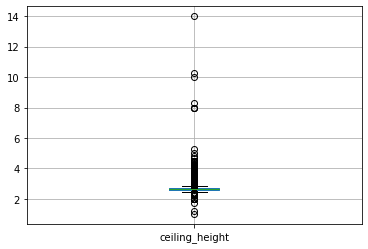

In [164]:
data.boxplot('ceiling_height');
data = data.query('2 < ceiling_height < 12')

хмм... быть может это какой-то супер пентхаус размером с высотой потолков в пятиэтажный дом? Не хочу думать, что это в потолках с высотой в 1,4 метра ошиблись, я б там жить не стал... отброшу его да и объявления, где потолки ниже 2 м... Гулять так гулять

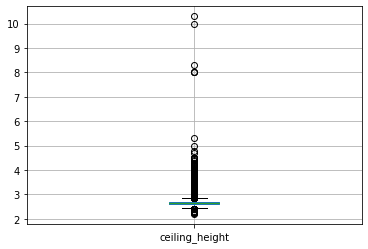

In [165]:
data.boxplot('ceiling_height');

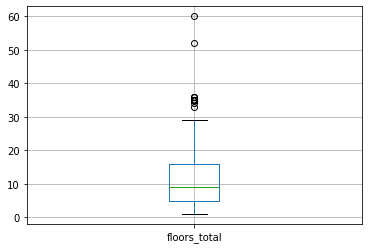

In [166]:
data.boxplot('floors_total');

ОГО! Есть небоскребы... пусть будут...

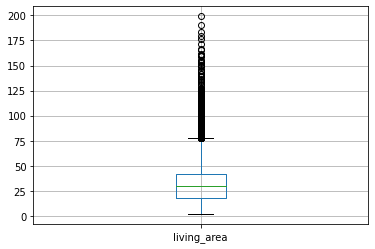

In [167]:
data.boxplot('living_area');

200 кв.м я б так жил... в целом тоже нет каких-то вырвиглаз значений. Оставляем.

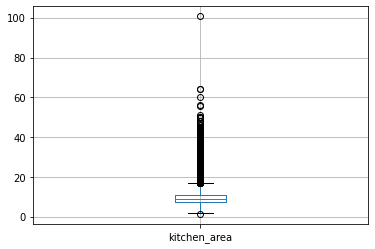

In [168]:
data.boxplot('kitchen_area');

Видимо... большая кухня - для большой квартиры, штош - красиво жить не запретишь.

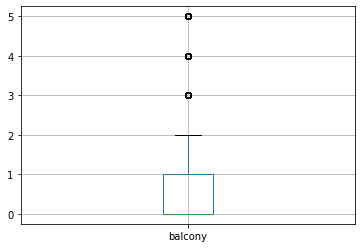

In [169]:
data.boxplot('balcony');

С балконами всё ок!

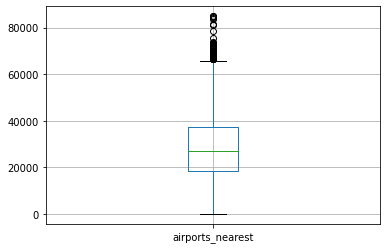

In [170]:
data.boxplot('airports_nearest');

В принципе, аэропорт в 80 км - не так далеко, меньше длины МКАДа(:

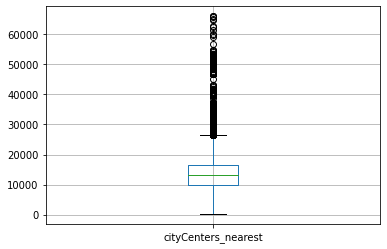

In [171]:
data.boxplot('cityCenters_nearest');

Ситуация та же, что и с аэропортами.
Хм... наверное, стоит переименовать эту колонку.

In [172]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest',
                              'parks_around3000':'parks_around_3000',
                              'ponds_around3000':'ponds_around_3000'})

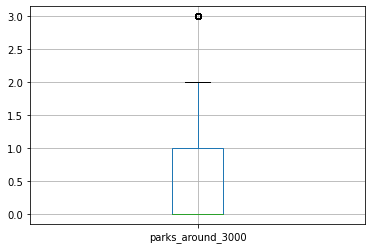

In [173]:
data.boxplot('parks_around_3000');

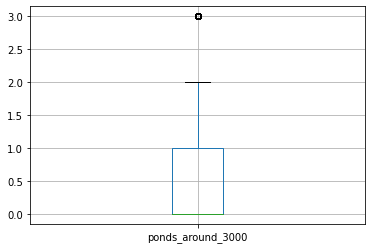

In [174]:
data.boxplot('ponds_around_3000');

Парков и прудов, которые находятся в пределах 3 км не более трех.

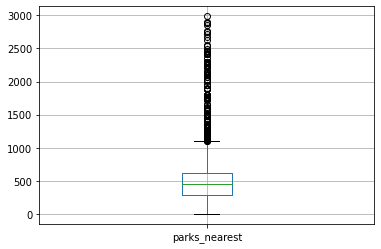

In [175]:
data.boxplot('parks_nearest');

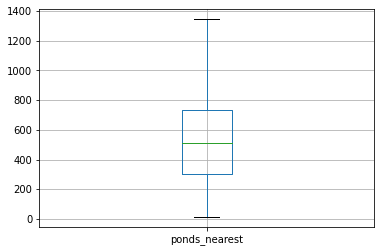

In [176]:
data.boxplot('ponds_nearest');

Все пруды поблизости укладываются в какую-то общую картину, чего нельзя сказать о парках, но и там расстояния до самого дальнего не превышает 3 км, так что пойдет.

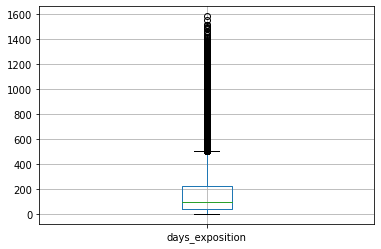

In [177]:
data.boxplot('days_exposition');

Что-то продавалось почти 5 лет... Жесть.
Можно отбросить данные, которые превышают 3 года, просто для вида(:

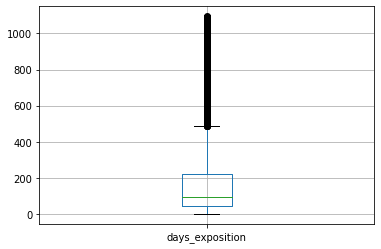

In [178]:
data = data.query('days_exposition < 1095')
data.boxplot('days_exposition');

Кажется, всё!

### Посчитайте и добавьте в таблицу новые столбцы

#### цена одного квадратного метра;
#### день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
#### месяц публикации объявления;
#### год публикации объявления;
#### тип этажа квартиры (значения — «‎первый», «последний», «другой»);
#### расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [180]:
data['price_by_sqrm'] = data['last_price']/data['total_area']
#колонка с ценой за кв.м

In [181]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['day_of_the_week_published'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_published'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_published'] = pd.DatetimeIndex(data['first_day_exposition']).year
#колонки с днем недели, месяцем и годом публицкации

In [182]:
def floorType(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floorType, axis=1)
#колонка с типом этажа

In [183]:
data['km_to_city_center'] = round(data['city_centers_nearest']/1000)
#колонка с расстоянием до центра города в км, округленное до целых

### Проведите исследовательский анализ данных

count    19536.000000
mean        55.834082
std         23.810049
min         12.000000
25%         39.500000
50%         50.000000
75%         66.000000
max        320.000000
Name: total_area, dtype: float64

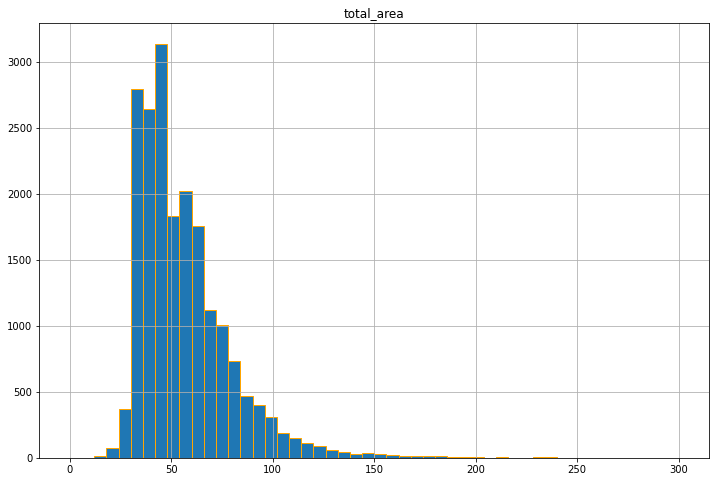

In [184]:
data.hist('total_area', bins=50, range=(0, 300), figsize=(12,8), ec='orange');
data['total_area'].describe()

count    19536.000000
mean        31.870620
std         16.177431
min          2.000000
25%         18.000000
50%         30.000000
75%         40.500000
max        199.000000
Name: living_area, dtype: float64

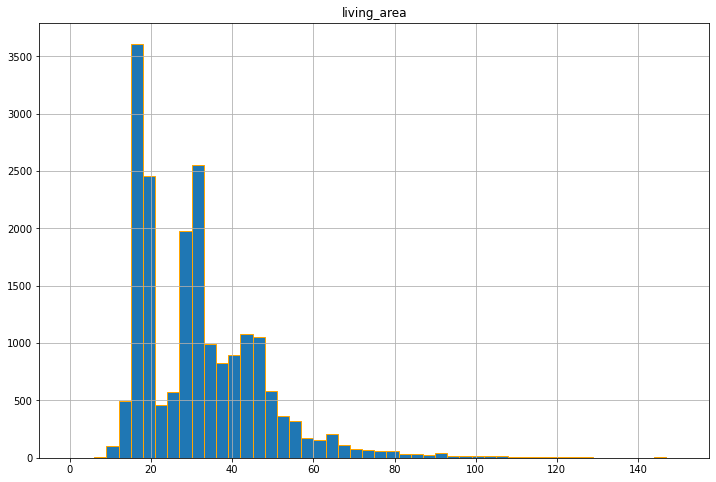

In [185]:
data.hist('living_area', bins=50, range=(0, 150), figsize=(12,8), ec='orange');
data['living_area'].describe()

count    19536.000000
mean         9.941618
std          4.322214
min          2.000000
25%          7.200000
50%          9.000000
75%         11.000000
max        100.700000
Name: kitchen_area, dtype: float64

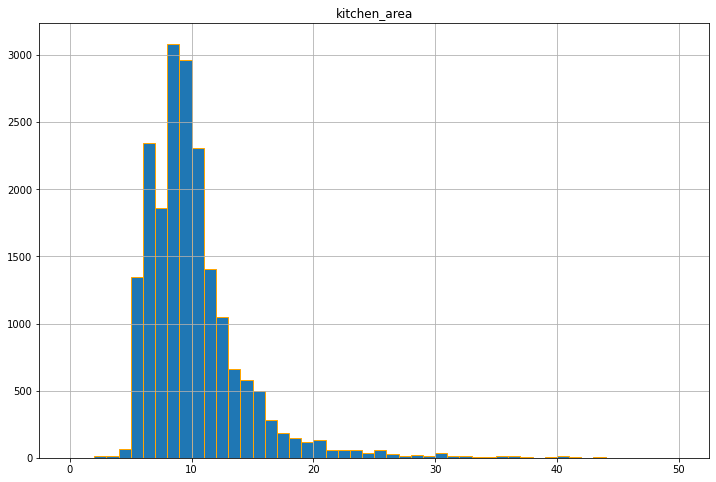

In [186]:
data.hist('kitchen_area', bins=50, range=(0, 50), figsize=(12,8), ec='orange');
data['kitchen_area'].describe()

Подавляющее большинство объявлений с квартирами, общая площадь которых не превышает 66 км.м, при этом жилая площадь соствляет 40 км.м, а площадь кухни 11 кв.м.

count    1.953500e+04
mean     5.267811e+06
std      3.023205e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.300000e+06
max      1.999900e+07
Name: last_price, dtype: float64

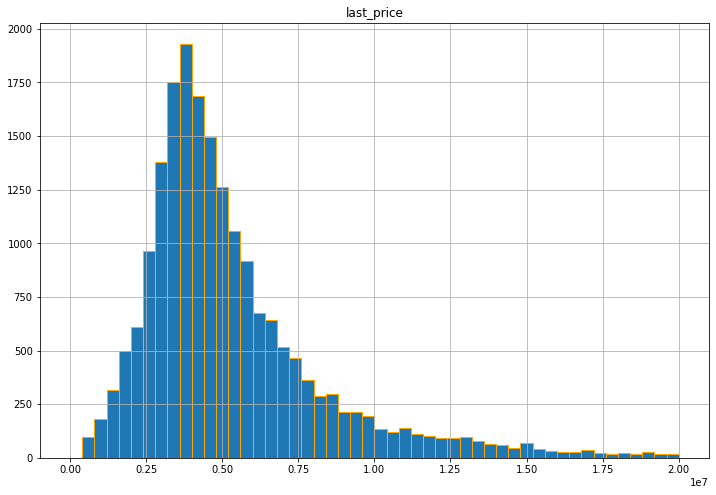

In [187]:
data = data.query('last_price > 100000')
data.hist('last_price', bins=50, range = (0, 20000000), figsize=(12,8), ec='orange');
data['last_price'].describe()

Нашел еще одно супер значение... цена квартиры в 100 кв.м за 12190. Видимо кто-то ошибся. Убрал его. Большая часть объявлений имеет цену в пределах 7 млн, приемлемо.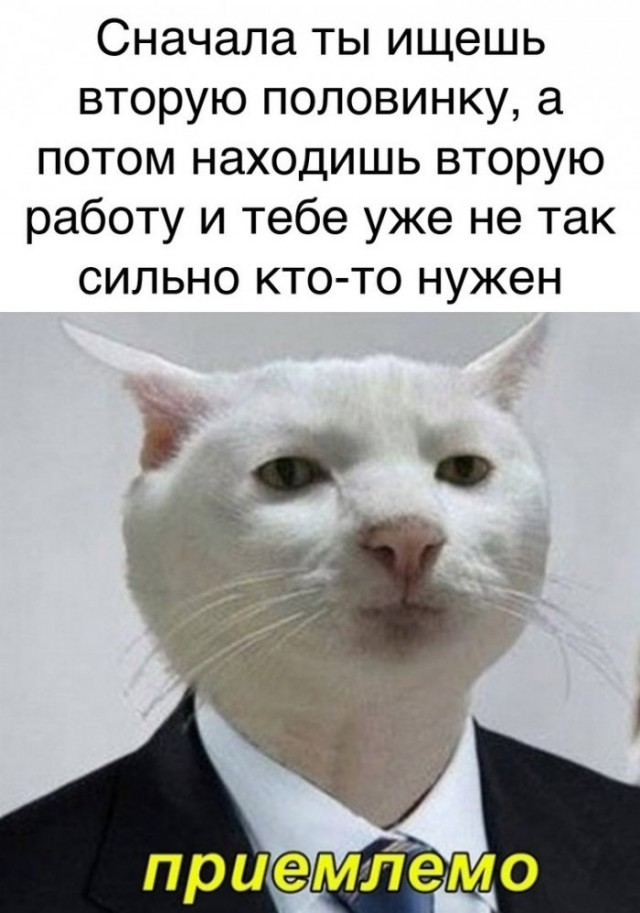

count    19535.000000
mean         1.986844
std          0.953179
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

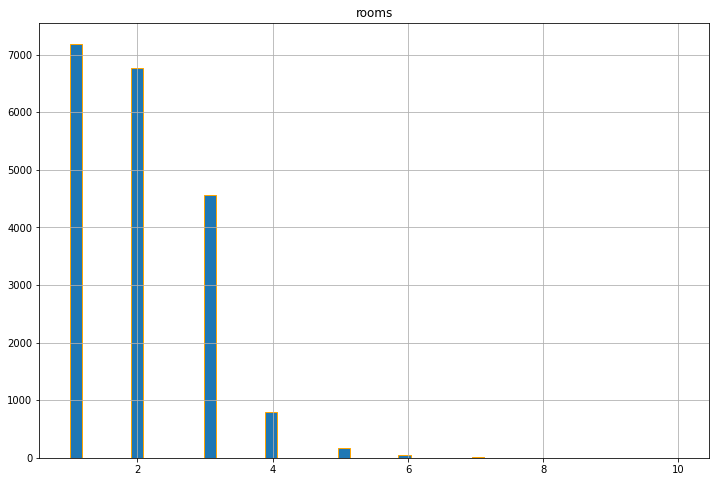

In [188]:
data.hist('rooms', bins=50, range = (1, 10), figsize=(12,8), ec='orange');
data['rooms'].describe()

БОльшая часть квартир имеюют 1-2 комнаты. Но так же есть квартиры с 10 комнатами...

count    19535.000000
mean         2.683272
std          0.219438
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

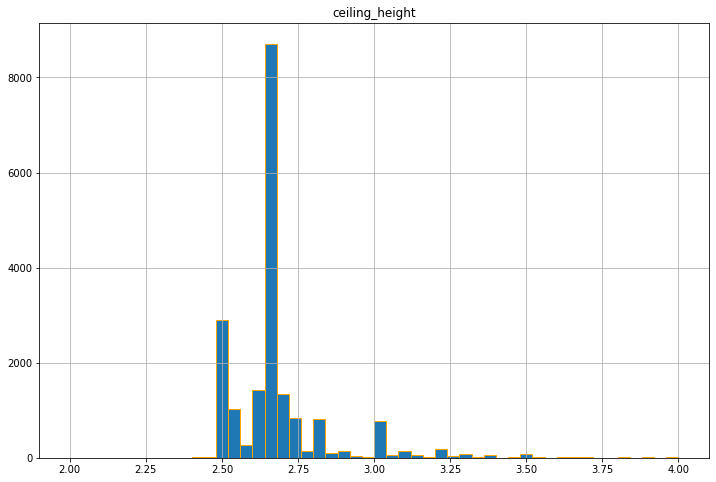

In [189]:
data.hist('ceiling_height', bins=50, range = (2, 4), figsize=(12,8), ec='orange');
data['ceiling_height'].describe()

Подавляющее большинство квартир имеют высоту потолков 2,7 м.

count    19535.000000
mean         5.958843
std          4.924041
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

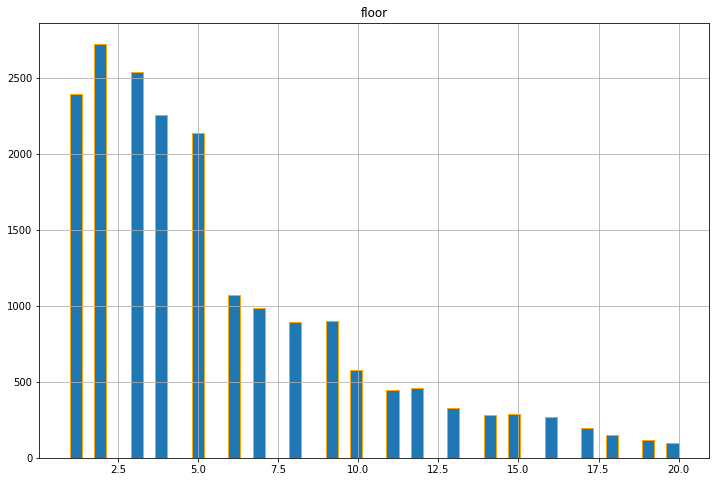

In [190]:
data.hist('floor', bins=50, range = (1, 20), figsize=(12,8), ec='orange');
data['floor'].describe()

Наибольшая часть квартир находится в пределах 8 этажа. Можно подумать, что бОльшая часть квартир находится в домах с 9-10 этажами, т.е. не в новостройках. Посмотрим...

count      19535
unique         3
top       другой
freq       14462
Name: floor_type, dtype: object

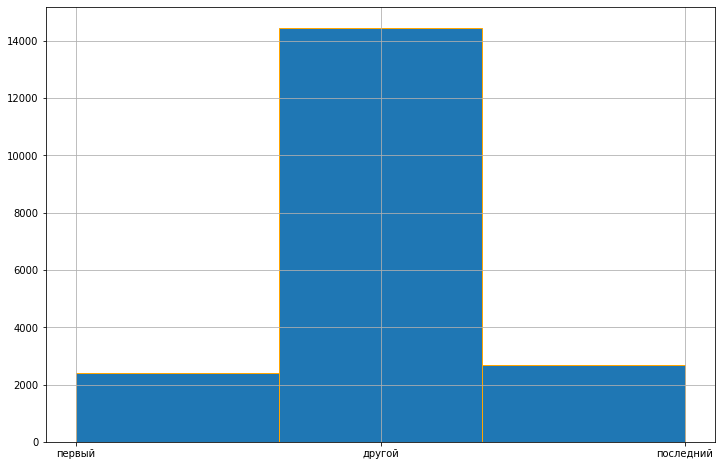

In [191]:
data['floor_type'].hist(bins=3, figsize=(12,8), ec='orange');
data['floor_type'].describe()

Примерно поровну квартир на первом и на последнем этажах. Но подавляющее большинстов находится где-то между(:

count    15007.000000
mean     14573.490171
std       8526.149896
min        208.000000
25%       9989.000000
50%      13317.000000
75%      16498.500000
max      65105.000000
Name: city_centers_nearest, dtype: float64

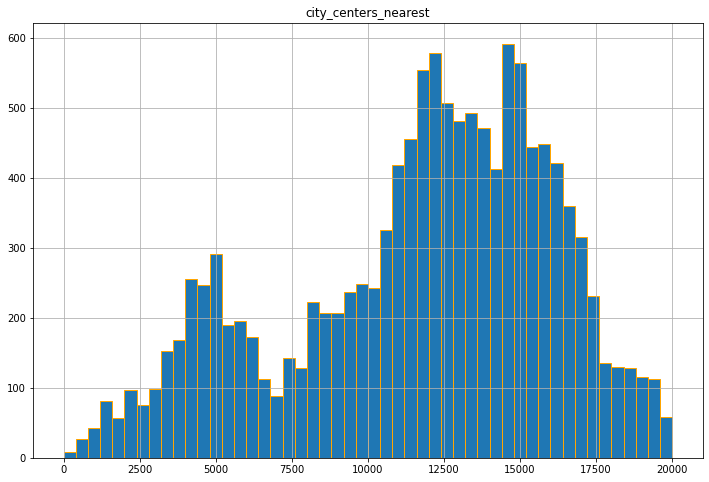

In [192]:
data.hist('city_centers_nearest', bins=50, range = (0, 20000), figsize=(12,8), ec='orange');
data['city_centers_nearest'].describe()

БОльная часть квартир находится в пределах 20 км от центра города.

count    14990.000000
mean     28926.748833
std      12849.396498
min          0.000000
25%      18359.250000
50%      26974.000000
75%      37510.750000
max      84006.000000
Name: airports_nearest, dtype: float64

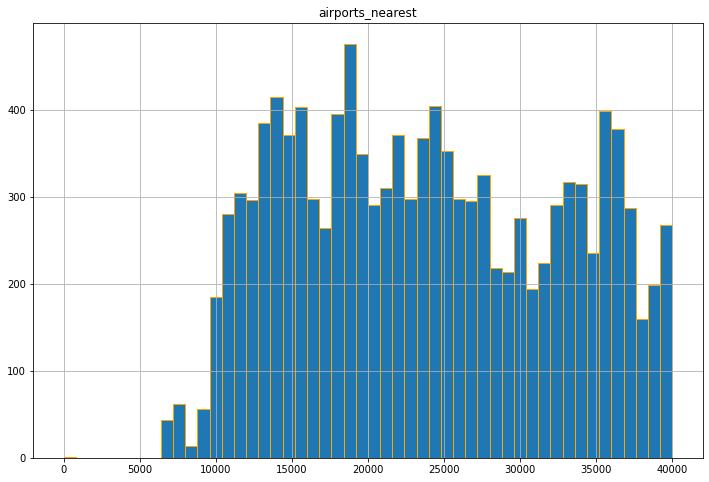

In [193]:
data.hist('airports_nearest', bins=50, range = (0, 40000), figsize=(12,8), ec='orange');
data['airports_nearest'].describe()

Есть квартира, которая, судя по гистограмме находится прямо в аэропорту. Отброшу ее. В остальном - от большинства квартир ехать до аэропорта не более 40 км.

In [194]:
data = data.query('airports_nearest!=0')

count    6412.000000
mean      490.273238
std       334.549752
min         1.000000
25%       288.000000
50%       455.000000
75%       614.000000
max      2984.000000
Name: parks_nearest, dtype: float64

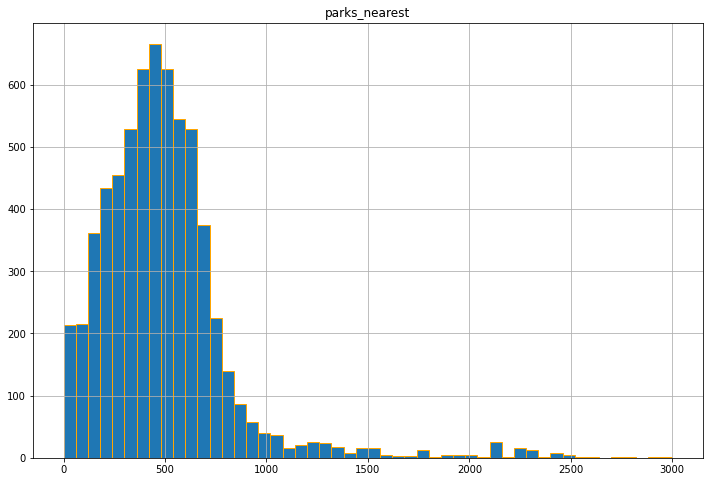

In [195]:
data.hist('parks_nearest', bins=50, range = (0, 3000), figsize=(12,8), ec='orange');
data['parks_nearest'].describe()

Все объявления, где указано расстояние до ближайшего парка, имеют это самое расстояние не более 3 км, однако кому-то повезет (или уже повезло) жить прямо перед парком, буквально в метре)

count    19534.000000
mean         2.583751
std          1.784081
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_the_week_published, dtype: float64

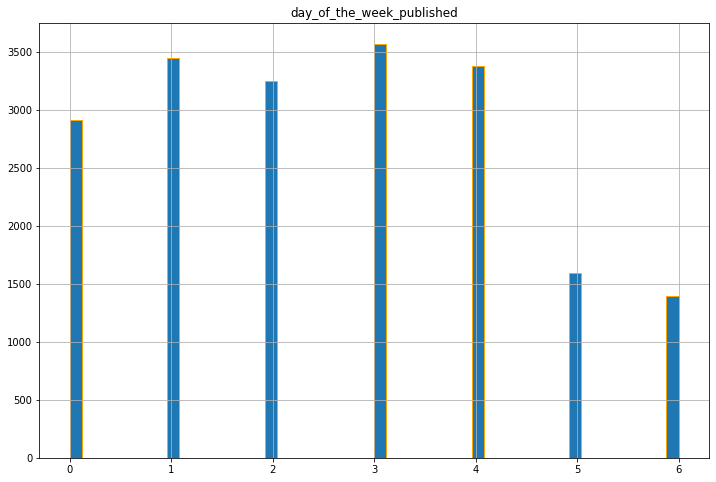

In [196]:
data.hist('day_of_the_week_published', bins=50, range = (0, 6), figsize=(12,8), ec='orange');
data['day_of_the_week_published'].describe()

count    19534.000000
mean         6.578018
std          3.482795
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month_published, dtype: float64

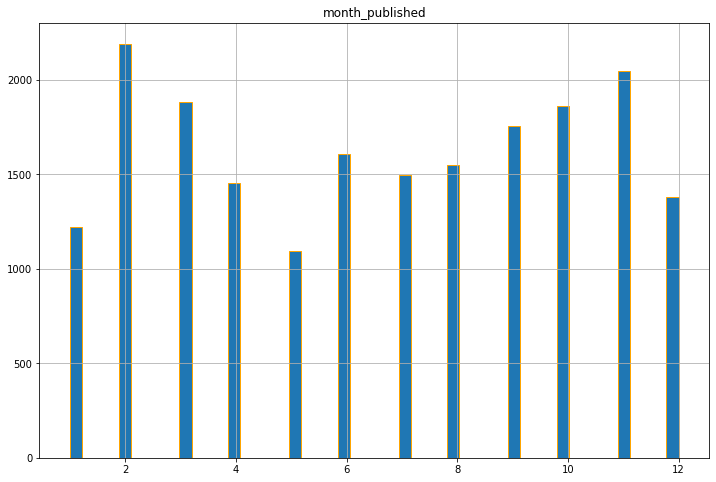

In [197]:
data.hist('month_published', bins=50, range = (1, 12), figsize=(12,8), ec='orange');
data['month_published'].describe()

Никто не хочет работать по выходным, вот и наименьшее количество объявлений публиковалось в выходные дни. Видимо с этим же связаны просадки в количестве объяевлений в январе и мае - много праздничных дней.

count    19534.000000
mean       170.123323
std        196.112737
min          1.000000
25%         44.000000
50%         93.000000
75%        222.000000
max       1094.000000
Name: days_exposition, dtype: float64

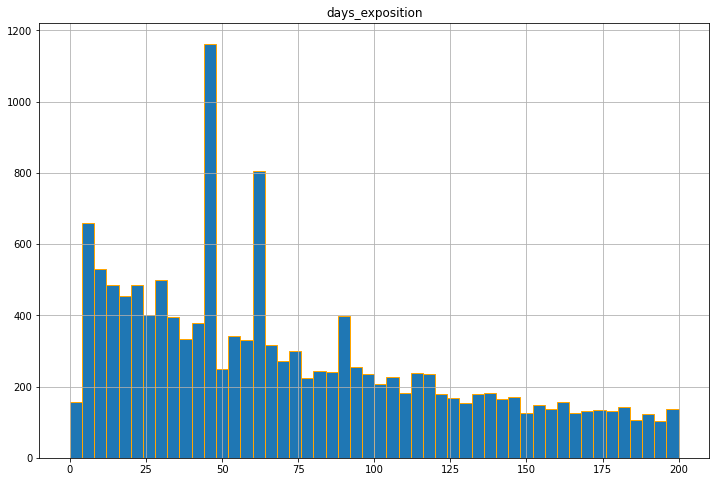

In [198]:
data.hist('days_exposition', bins=50, range = (0, 200), figsize=(12,8), ec='orange');
data['days_exposition'].describe()


Похоже, что подавляющее число объявлений были закрыты в первый год после публикации. Среднее число дней до снятия составляет 196 дней, а медианное 93 дня.

0.768865494651082

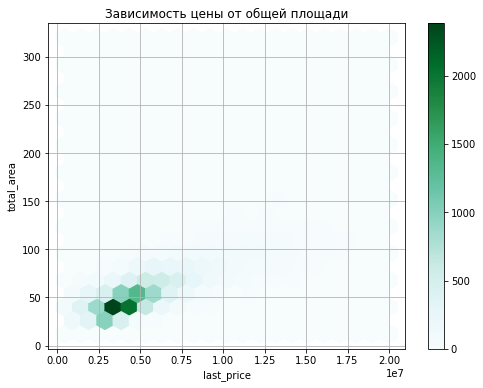

In [199]:
(data.plot(x='last_price',
           y='total_area',
           kind='hexbin',
           gridsize=20,
           figsize=(8, 6),
           sharex=False,
           grid=True,
           title='Зависимость цены от общей площади'))
data['last_price'].corr(data['total_area'])

Зависимость довольно значимая, хоть и разброс достаточно велик.

0.6464586035462045

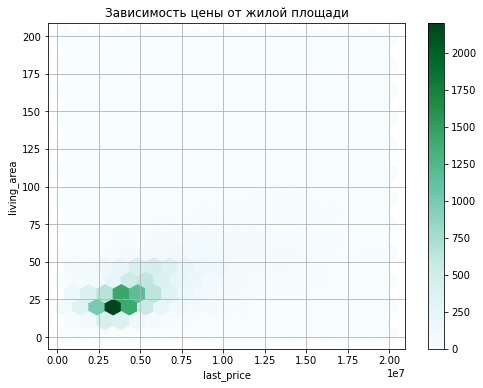

In [200]:
(data.plot(x='last_price',
           y='living_area',
           kind='hexbin',
           gridsize=20,
           figsize=(8, 6),
           sharex=False,
           grid=True,
           title='Зависимость цены от жилой площади'))
data['last_price'].corr(data['living_area'])

Ситуация та же, что и с общей площадью. Немного уступает в значимости.

0.548534592609306

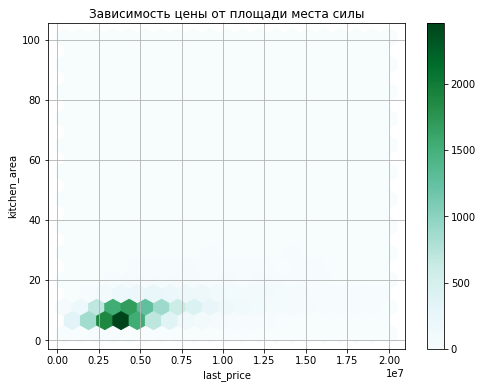

In [201]:
(data.plot(x='last_price',
           y='kitchen_area',
           kind='hexbin',
           gridsize=20,
           figsize=(8, 6),
           sharex=False,
           grid=True,
           title='Зависимость цены от площади места силы'))
data['last_price'].corr(data['kitchen_area'])

Не просто так, все кого я знаю, проводят на кухне бОльшую часть времени, когда они дома)
Зависимость точно есть! Но не такая явная как от жилой и общей площадей.

0.5140301130698938

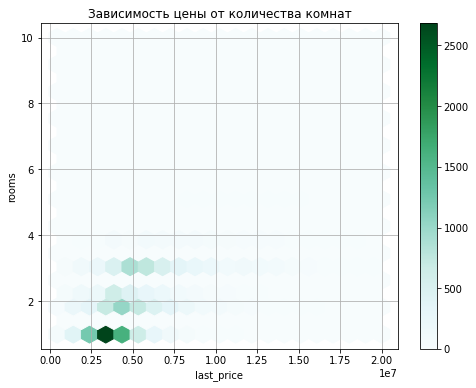

In [202]:
(data.plot(x='last_price',
           y='rooms',
           kind='hexbin',
           gridsize=20,
           figsize=(8, 6),
           sharex=False,
           grid=True,
           title='Зависимость цены от количества комнат'))
data['last_price'].corr(data['rooms'])

Можно сказать, что площадь кухни больше влияет на стоимость квартиры, чем количество комнат)

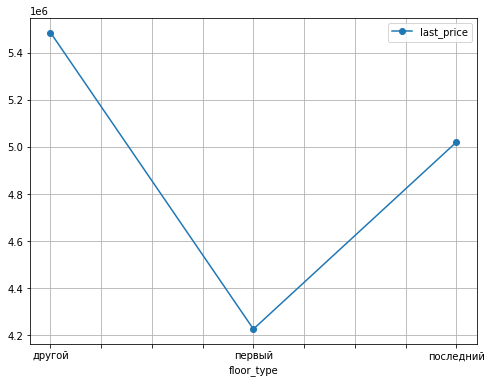

In [203]:
(data.pivot_table(index='floor_type', values='last_price').
 plot(grid=True, style='o-',figsize=(8, 6)));
#не могу понять как посчитать корреляцию от этажа (первый, последний, другой)

0.1040351800903209

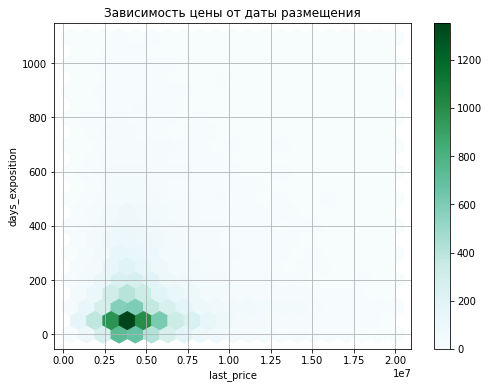

In [204]:
(data.plot(x='last_price',
           y='days_exposition',
           kind='hexbin',
           gridsize=20,
           figsize=(8, 6),
           sharex=False,
           grid=True,
           title='Зависимость цены от даты размещения'))
data['last_price'].corr(data['days_exposition'])

Зависимость цены от дня размещения -0.011547657641484913
Зависимость цены от месяца размещения 0.007543670457801678
Зависимость цены от месяца размещения -0.04726263142304489


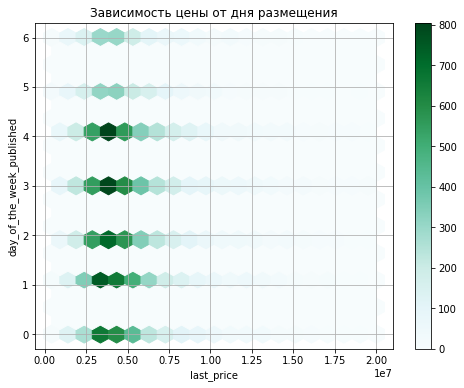

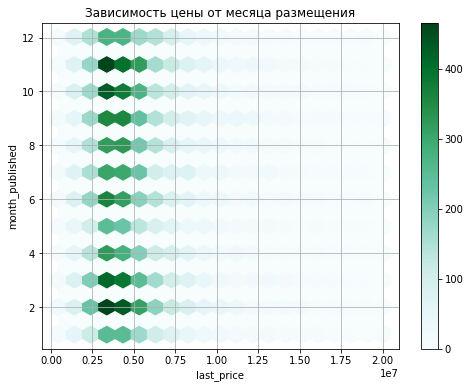

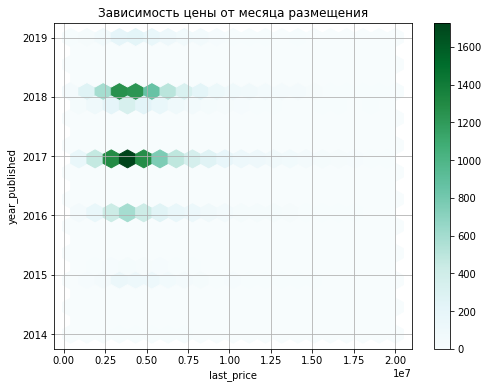

In [205]:
(data.plot(x='last_price',
           y='day_of_the_week_published',
           kind='hexbin',
           gridsize=20,
           figsize=(8, 6),
           sharex=False,
           grid=True,
           title='Зависимость цены от дня размещения'))
print('Зависимость цены от дня размещения', data['last_price'].corr(data['day_of_the_week_published']))

(data.plot(x='last_price',
           y='month_published',
           kind='hexbin',
           gridsize=20,
           figsize=(8, 6),
           sharex=False,
           grid=True,
           title='Зависимость цены от месяца размещения'))
print('Зависимость цены от месяца размещения', data['last_price'].corr(data['month_published']))

(data.plot(x='last_price',
           y='year_published',
           kind='hexbin',
           gridsize=20,
           figsize=(8, 6),
           sharex=False,
           grid=True,
           title='Зависимость цены от месяца размещения'))
print('Зависимость цены от месяца размещения', data['last_price'].corr(data['year_published']))

Нет взаимосвязи. Корреляция стремится к нулю.

In [206]:
price = data.pivot_table(index='locality_name', values='price_by_sqrm', aggfunc=['count', 'mean'])
price.columns = ['count', 'mean']
price = price.sort_values('mean', ascending=False)
price.head(10)

,count,mean
locality_name,,
Лисий Нос,2,113728.348730
Санкт-Петербург,12858,106888.808346
Сестрорецк,161,100963.835858
Пушкин,297,100820.768660
Зеленогорск,20,100701.778503
Левашово,1,96997.690531
Мистолово,9,96157.152893
Кудрово,416,94132.113419
Парголово,297,89537.699898


Ну... При условии, что количество 5 из 10 объявлений по населенному пункту мало, то, наверное, имеет смысл сортировать по количеству публикций, а не по цене.

In [207]:
price = price.sort_values('count', ascending=False)
price.head(10)

,count,mean
locality_name,,
Санкт-Петербург,12858,106888.808346
Мурино,519,85147.977128
Кудрово,416,94132.113419
Шушары,402,77522.488385
Всеволожск,332,66831.712503
Колпино,306,74736.739073
Пушкин,297,100820.768660
Парголово,297,89537.699898
Гатчина,268,67928.326990


In [208]:
print(price[price['mean']==price['mean'].max()])
print(price[price['mean']==price['mean'].min()])
# если можно как-то еще, с радостью впитаю эту информацию

               count          mean
locality_name                     
Лисий Нос          2  113728.34873
               count          mean
locality_name                     
Старополье         3  11206.221198


Разница в среднем за квадратный в 10 раз! ОБАЛДЕТЬ...Разница в среднем за квадратный в 10 раз! ОБАЛДЕТЬ...

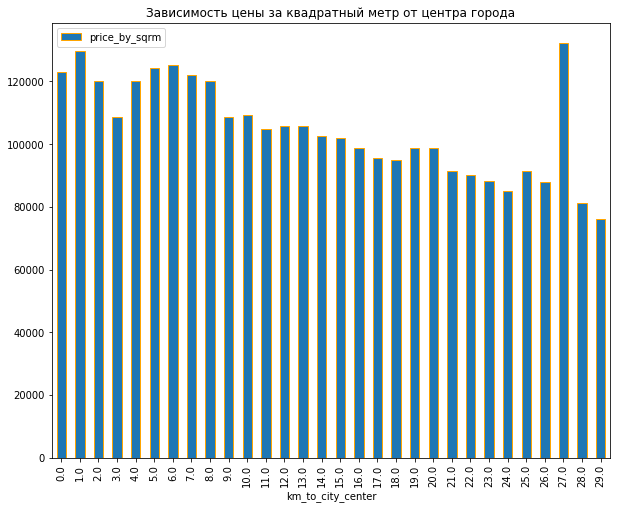

In [213]:
price_in_spb = data.query('locality_name == "Санкт-Петербург"')
price_in_spb = price_in_spb.pivot_table(index='km_to_city_center', values='price_by_sqrm')
(price_in_spb.plot(kind='bar', 
                   ec='orange', 
                   figsize=(10,8), 
                   title='Зависимость цены за квадратный метр от центра города'));
#data.loc[data['locality_name']=="Санкт-Петербург", 'km_to_city_center'].corr(data['price_by_sqrm'])
# вроде такая корреляция будет...

Не считая выбросов (там видимо какой-то особняк), чем ближе к центру - тем выше цена. Корреляция обратная, слабая видимо из-за выброса.

In [210]:
data['price_by_sqrm'].corr(data['km_to_city_center'])

-0.38996251326225745

<AxesSubplot:>

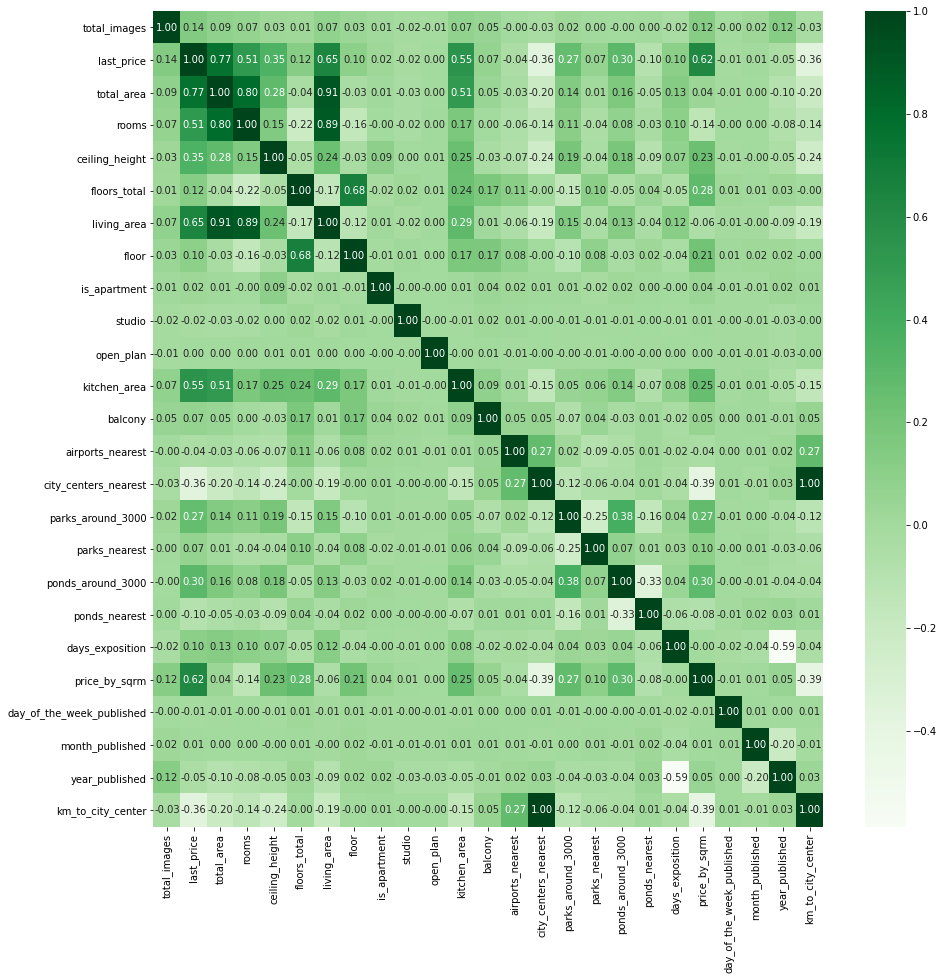

In [211]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="Greens", fmt='.2f')

### Общий вывод

Изучили данные, поменяли типы данных, удалили неявные дубликаты в населенных пунктах, узнали когда люди меньше всего работают (выставляют объявления), сделали выводы о цене.

Больше всего на стоимость как и следовало ожидать влияет общая площадь (показатель обладает самой высокой корреляцией).

На удивление цена за квадратный метр обратно коррелируется относительно расстояния до центра, и меньше, чем упомянутрая ранее.

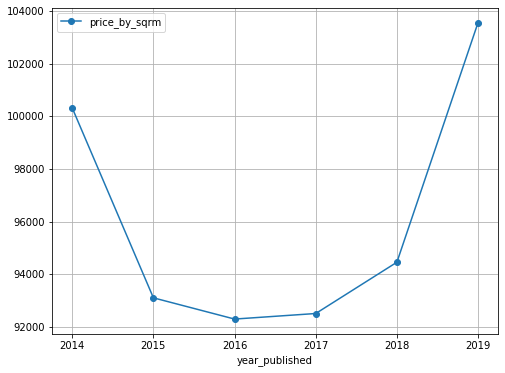

In [212]:
(data.pivot_table(index='year_published', values='price_by_sqrm').
 plot(grid=True, style='o-',figsize=(8, 6)));

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод